In [4]:
import numpy as np 
from matplotlib import pyplot as plt
import sys 

# We need to solve this once and for all
sys.path.append('/Users/sdea/Coding/pyCASINO/pycasino')

import functions, constants, utils

In [5]:
sim_param = utils.SimulationParameters()
sim_param.print_params()

Simulation Parameters:
------------------------------
Simulation type                    : bulk
E_beam (keV)                       : 30
Z (Atomic number)                  : 14
A (Atomic weight, g/mol)           : 28.0855
rho (Density, g/cm³)               : 2.33
x (Initial x-coordinate)           : 0
y (Initial y-coordinate)           : 0
theta (Incidence angle, degrees)   : 0
N_electrons (Number of electrons)  : 10000
max_events (Maximum scattering events): 1000


In [6]:
# Simulate based on the default
sim_param.N_electrons = 1000
sim_param.E_beam = 5
sim_result = functions.get_bulk_results(sim_param)

N Electrons: 100%|██████████| 1000/1000 [00:01<00:00, 518.70it/s]


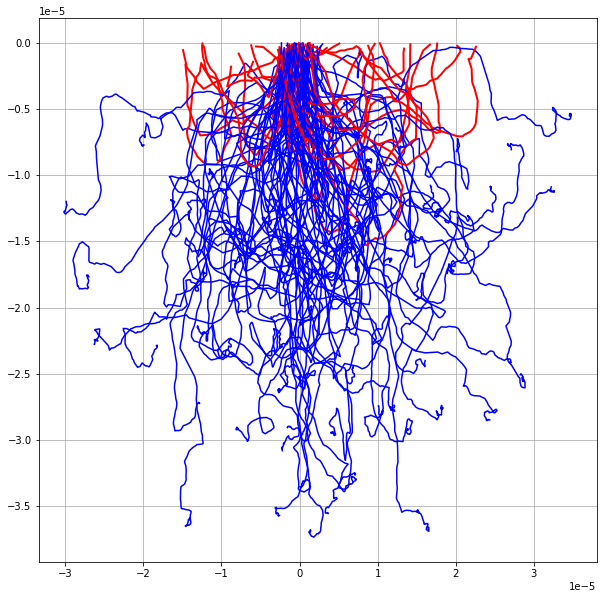

In [7]:
# Plot the results
utils.plot_simulation_results(sim_result.x_list, sim_result.y_list, sim_result.bse_list)

In [ ]:
np.max(sim_result.x_list[0]) * 1E07

In [ ]:
sim_result.x_list[0]